More and more business owners, especially restaurants are paying close attension to their business reviews on Yelp from different customers. The more reviews on Yelp, it is more likely to attract more customers and increase the revenue. Yelp typically has two component of the reviews, one is the star rating of 1-5, the other is the review comments. However, many restaurants have a lot of reviews. Simply looked at the star ratings for the particular restaurant does not give us what were the customers' experience. In addition, the business review stars is an aggregate values of thoundsounds of reivewers' star ratings. Therefore, it is necessary to review the text comments. In this notebook, I will first to do some basic data exploration of the yelp dataset. Then I will apply the sentiment analysis on the review comments and develope two predictive models based on the review comments, predict the star ratings for the individual customers and predict the continuity of business. 

# Importing data and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm 

#Set up all the columns to display
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#import different nlp packages
import nltk
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [2]:
# Import files
# business = pd.read_csv('gs://mybucket_terrancexia/Yelp/business.csv')
# checkin = pd.read_csv('gs://mybucket_terrancexia/Yelp/checkin.csv')
# review = pd.read_csv('gs://mybucket_terrancexia/Yelp/review.csv')

#import big file user
# user = pd.read_csv('C:/Users/Terrance/Desktop/yelp/user.csv')

## import the review data for 2015- 2017
# review1 = pd.read_csv('cleaned_data/review_15_17.csv')

#import the north america restaurant review for 2015-2017
# review_nora = pd.read_csv('cleaned_data/review_nora.csv')

#import the north america restaurant review for 2015-2017
# review_nora_cleaned = pd.read_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-11-29.csv')

#import the final review files
df = pd.read_csv('~/yelp/review_final.csv')

In [12]:
#Sanity Check
display(business.head())
display(checkin.head())
display(review.head())

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


# Data Cleaning

Data cleaning is crucial for this task. Below is the data cleaning steps I performed. 

Review File
1. Change the data type from string to data formate in the date column of the review file.
2. I am only interested in the the review comments between 2015 and 2017. Subset the 2015-2017 from the original review files.

Business File
1. The yelp data contains many different categories of business. Since I am only interested in restaurants, I will filter out the food and restaurant categories from the categories column
2. The business files contains different business around the world. For my analysis purpose, I am only interested in North America business. Therefore, I have filtered out the North America restaurants based on the North America state/province abbreviation. 
3. After filter out the business files, filter out the review files based on the updated business files. 

Check in file <br>
Aggregate the total number of check ins based on bussiness id. 

Cleaning <br>
For my analysis, review comments will be the major part. Therefore, it will required cleaned text. I performed the following steps to clean the review comments:
1. Tokenized the review comments at word level
2. Change all upper case to lower case
3. Remove regular English Stopwords based on the English stopwords packages in NLTK
4. Remove punctuations and other symbols/ words less than 2 characters
5. Untokenzied the word and returned a cleaned text column in the dataframe
6. Later I found there are foreign langues hidden in the review comments, so first I applied the languagedetect package to detect non-english review comments and remove them. However, some of the review comments are combined with English and foreign languages, and the language detect package have been treated those as english. Therefore, I used regex to retains only the english portion of the reviews. 



## Cleaning data for review files

### Status: Done <br>
Steps Completed:
    - change date formate
    - select only 2015-2017

### Final variable: review1. import from reivew_15_17.csv

In [13]:
# change date from object to date time
review['date'] = pd.to_datetime(review['date'], format = '%Y-%m-%d')

#sanity check
review['date'][0]

Timestamp('2016-05-28 00:00:00')

In [14]:
#check how many reviews in each year
pd.DatetimeIndex(review['date']).year.value_counts()

2017    1128518
2016    1052916
2015     911487
2014     678351
2013     472595
2012     350381
2011     290933
2010     187073
2009      98288
2008      61553
2007      23020
2006       5669
2005        870
2004         14
Name: date, dtype: int64

In [15]:
#select only reviews after 2015
review1 = review[(review['date']>="2015")]

In [16]:
#check on how many reviews in 2015, 2016, and 2017
pd.DatetimeIndex(review1['date']).year.value_counts()

2017    1128518
2016    1052916
2015     911487
Name: date, dtype: int64

In [17]:
# #export the review1 to csv

# review1.to_csv('review_15_17.csv')

In [18]:
review1.shape

(3092921, 9)

In [21]:
#get eliminate the not used last three columns
review1 = review1.iloc[:,:-3]
review1.head()

,review_id,user_id,business_id,stars,date,text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...


In [22]:
# check on missing values
review1.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
dtype: int64

## Cleaning data for business files. 

### Status: Done
Steps Completed: 
    - Filter out food and restaurant category
    - Filter out north america by state abbv
    - select review1 with only north amercia restaurant from previous steps by business id
      

### Final variable: review_nora

In [23]:
#filter only restuant and food from all business

business_filter = business[(business['categories'].str.contains("Food",regex=True))|
         (business['categories'].str.contains("Restaurant",regex=True))]

#sanity check
display(business.shape)
display(business_filter.shape)

(174567, 13)

(69079, 13)

In [24]:
#filter out North America Only
#check on different locations for the business
business_filter['state'].value_counts()

ON     16845
AZ     13826
NV      9263
OH      6031
QC      5941
NC      4969
PA      4686
BW      2023
WI      1984
EDH     1906
IL       786
SC       291
MLN      120
HLD       76
CHE       75
NYK       71
FIF       34
ELN       32
C         22
WLN       21
NY        12
NI        10
01        10
ST         8
VS         6
ESX        4
BY         3
IN         3
CO         2
GLG        2
XGL        2
6          1
30         1
CA         1
WHT        1
AK         1
VA         1
RCC        1
ABE        1
3          1
PKN        1
KHL        1
B          1
HU         1
FLN        1
ZET        1
Name: state, dtype: int64

In [25]:
#get only US and canada business

#set up list contains only north america state
state_abbv = pd.read_csv('gs://mybucket_terrancexia/Yelp/state_abbr.csv')

#get north amercia business only from business_filter
business_nora = business_filter[business_filter['state'].isin(state_abbv['Code'])]

state_count = business_nora['state'].value_counts()
# state_count.to_csv('state_count.csv')


In [26]:
# Select north america reviews only based on business_nora['business_id']
review_nora = review1[review1['business_id'].isin(business_nora['business_id'])]

display(review_nora.shape)
display(review1.shape)

(2027121, 6)

(3092921, 6)

In [29]:
review_nora.head()

,review_id,user_id,business_id,stars,date,text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...


In [33]:
# drop duplicated index columns
# review_nora = review_nora.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

#Export review_nora to csv
# review_nora.to_csv('cleaned_data/review_nora.csv')

In [14]:
#remove "" from name column.

# number_reviews = business_nora[['name','stars','review_count','latitude', 'longitude']]

# number_reviews['name'] = number_reviews['name'].apply(lambda x : x.replace('"',''))

# number_reviews.to_csv('number_reviews.csv')

In [15]:
# ON = business_nora[(business_nora['stars']==5.0)][['name','review_count','stars']]

# ON = ON.sort_values(by='review_count', ascending=False)

# Top_20 = ON.head(20)
# Top_20.to_csv('top20.csv')

<Figure size 1440x720 with 0 Axes>

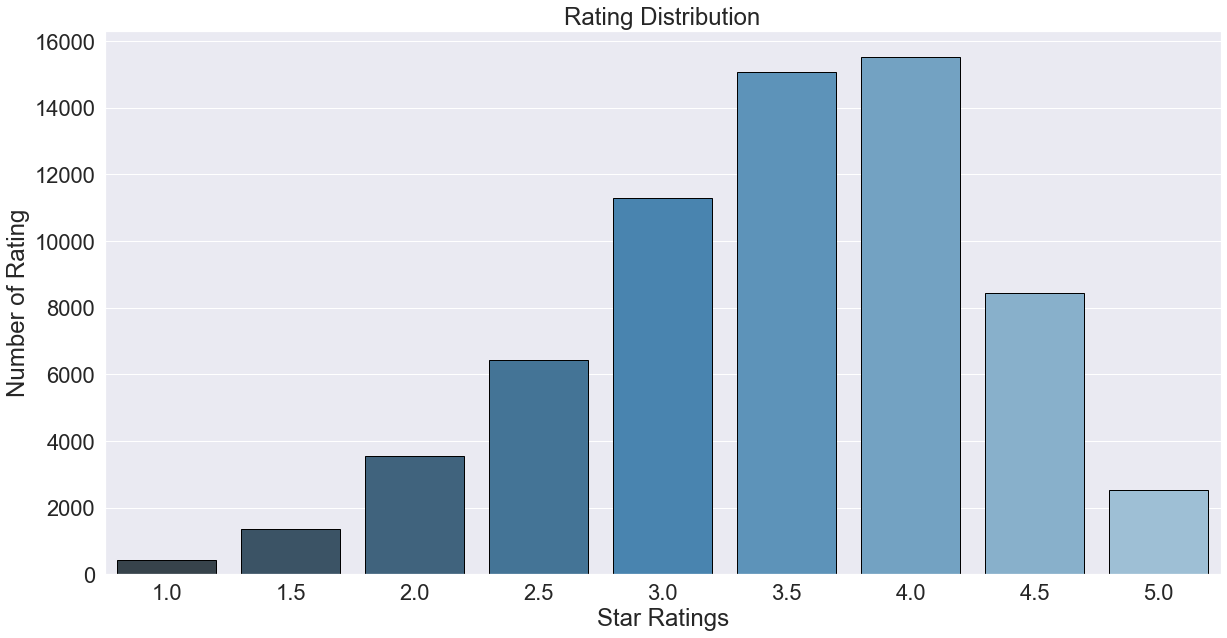

In [18]:
#plot out number of stars distribution 
sns.set(font_scale=15)
sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
sns.set(font_scale=2.0)
plt.figure(figsize=(20,10))
sns.countplot(number_reviews['stars'], edgecolor='black', palette = 'Blues_d')
plt.title('Rating Distribution')
plt.ylabel('Number of Rating')
plt.xlabel('Star Ratings')

plt.show()

## Clean Text review in review_nora

### Status: Done

    1. Tokenized the text
    2. Change to lower character for each tokens
    3. Remove stopwords 
    4. Remove punctuation 
    5. Untokenized the text 
    6. Unlist each row from list of strings to strings
    
### Final Variables: review_nora_cleaned
    

In [31]:
#import different nlp packages
import nltk
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [32]:
#define function to remove stop words
def remove_stopwords(list_of_tokens):
    '''
    Remove English Stop Words
    '''
    
    cleaned_tokens = []
    for token in list_of_tokens:
        if token in ENGLISH_STOP_WORDS: continue
        cleaned_tokens.append(token)
        
    return cleaned_tokens

In [33]:
#define function to remove punctuation, character less than 2, remove extra''
def remove_punctuation(list_of_tokens):
    '''
    1. Remove Punctuation
    2. Remove character less than 2
    3. Remove extra '' in the list
    
    '''
    cleaned_tokens = []
    for word in list_of_tokens:
          
        #remove punctuation
        for punctuation in string.punctuation:
            word = word.replace(punctuation,'')
            
            #remove character less than 2
            word = re.sub(r'\b\w{1,2}\b', '', word)
            
        #append the word to cleaned token
        cleaned_tokens.append(word)
        
        #remove extra '' in the list
        while('' in cleaned_tokens):
            cleaned_tokens.remove('')
            
    return cleaned_tokens

In [34]:
#define a function to untokenlize the tokens
def the_untokenizer(token_list):
    '''
    Untokenize the token back to string
    '''
    return " ".join(token_list)

In [35]:
#define a function to cleaning_out_texts to combine functions:tokenize, remove_stopwords, remove_punctuation, the_untokenizer

def cleaning_out_texts(text):
    '''
    1. Tokenized the text
    2. Change to lower character for each tokens
    3. Apply remove_stopwords function defined above
    4. Apply remove_punctuation function defined above
    5. Apply the_untokenizer function defined above
    6. Returned cleaned text
    
    '''
    cleaned_text = []
    
    tokenizer_list = word_tokenize(text)
    
    lower_word = []
    for word in tokenizer_list:
        
        word = word.lower()
        
        lower_word.append(word)
    
    removed_stopwords_list = remove_stopwords(lower_word)
        
    removed_punctuation_list = remove_punctuation(removed_stopwords_list)
                
    back_to_string = the_untokenizer(removed_punctuation_list)
        
    cleaned_text.append(back_to_string)
        
    return cleaned_text       

In [39]:
review_nora['cleaned_text']= review_nora['text'].apply(cleaning_out_texts)
review_nora.head()

,review_id,user_id,business_id,stars,date,text,cleaned_text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,[super simple place amazing nonetheless serve ...
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,[small unassuming place changes menu cool deco...
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,[lester located beautiful neighborhood 1951 kn...
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,[love coming yes place needs floor swept peanu...
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,[chocolate almond croissant amazing light butt...


In [40]:
# define a function to remove extra '' and unpack the list

def unlist(list):
    return str(list).strip("[],''")

In [42]:
#apply the unlist function to cleaned_text
review_nora['cleaned_text']=review_nora['cleaned_text'].apply(unlist)

In [43]:
review_nora['cleaned_text'].head()

0    super simple place amazing nonetheless serve t...
1    small unassuming place changes menu cool decor...
2    lester located beautiful neighborhood 1951 kno...
3    love coming yes place needs floor swept peanut...
4    chocolate almond croissant amazing light butte...
Name: cleaned_text, dtype: object

In [49]:
#Reset index for review_nora

review_nora = review_nora.reset_index(drop=True)
display(review_nora.head())
review_nora.index

,review_id,user_id,business_id,stars,date,text,cleaned_text
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...


RangeIndex(start=0, stop=2027121, step=1)

In [94]:
#export the updated review_nora_cleaned 2019-11-28 to csv
# review_nora_cleaned.to_csv('~/yelp/review_nora_cleaned_2019_11_28.csv')

## Clean checkin files

### Status: Done

    1. Aggregate number of checkins by business id 
    

### Final Variable Name: aggregate_checkins

In [51]:
checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [53]:
aggregate_checkins = checkin.groupby('business_id').agg({'checkins':['sum']}).reset_index()
aggregate_checkins.columns =['business_id','num_checkins']
aggregate_checkins.head()

,business_id,num_checkins
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153
2,--8LPVSo5i0Oo61X01sV9A,1
3,--9QQLMTbFzLJ_oT-ON3Xw,33
4,--9e1ONYQuAa-CB_Rrw7Tw,2568


# Convert Words to Numbers

Feature Engingeering 
1. Applying TextBlob packages to get the polarity and subjective score for each review and append to the dataframe
2. Applying sentiment packages from VADER to get the netural, negative, and positive ratings for each reviews and append to dataframe
3. Get the length of the review comments for each row and append to the dataframe
4. Append the number of check in, whether the business is open from the business file based on the business id



## Status: Done

    1. Using Textblob to get the polarity and subjectivity
    2. Get the length of each review text
    3. Using VADER Packages to get the postive, neutral, negative sentiment in each review

### Using Textblob to get the polarity and subjectivity in the sentence: Done


In [56]:
#Using Textblob to get polarity and subjectivity by sentence
from textblob import TextBlob

polarity = []
subjectivity = []

for n in range(review_nora.shape[0]):
    
    polar_score = TextBlob(review_nora['cleaned_text'][n]).sentiment[0]
    subject_score = TextBlob(review_nora['cleaned_text'][n]).sentiment[1]
    
    polarity.append(polar_score)
    subjectivity.append(subject_score)

review_nora['polarity']=polarity
review_nora['subjectivity']=subjectivity

In [13]:
#save the cleaned version to csv
# review_nora.to_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-11-29.csv', index=False)

In [57]:
review_nora.head(2)

,review_id,user_id,business_id,stars,date,text,cleaned_text,polarity,subjectivity
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429


### Get the length of each review: Done


In [58]:
# Testing on getting length of words in the review
a= review_nora['cleaned_text'][0]
display(a)
len(a.split())


'super simple place amazing nonetheless serve thing started bologna salami sandwich mustard staff helpful friendly'

15

In [59]:
# getting the length of words for each row
review_length = []

for n in range(review_nora.shape[0]):
    
    length = len(review_nora['cleaned_text'][n].split())
    
    review_length.append(length)
    

#sanity check 
display(review_nora.shape)
display(len(review_length))
    

(2027121, 9)

2027121

In [60]:
# Append the review_length to the review_nora_cleaned df
review_nora['review_length']= review_length

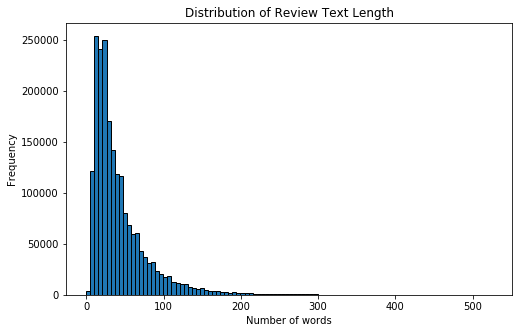

In [61]:
# Visualize the distribution of review_length

plt.figure(figsize=(8,5))
plt.hist(review_length, edgecolor='black', bins =100)
plt.title('Distribution of Review Text Length')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

In [45]:
# save the updated files to csv
# review_nora_cleaned.to_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-12-01.csv', index=False)

### Change the text to sentiment using vader package


VADER Sentiment Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
It is fully open-sourced under the MIT License. The developers of VADER have used Amazon’s Mechanical Turk to get most of their ratings, You can find complete details on their Github Page.

ADER has a lot of advantages over traditional methods of Sentiment Analysis, including:
It works exceedingly well on social media type text, yet readily generalizes to multiple domains
It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
It is fast enough to be used online with streaming data, and
It does not severely suffer from a speed-performance tradeoff.

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 67% Positive, 33% Neutral and 0% Negative. Hence all these should add up to 1.
The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). In the case above, lexicon ratings for andsupercool are 2.9and respectively1.3. The compound score turns out to be 0.75 , denoting a very high positive sentiment.

compound score metric

positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

In [62]:
#import vader packages
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [63]:
# getting sentiment ratings from the text reviews and append each row as dictionary in the list l1
l1=[]
for j in range(review_nora.shape[0]):
    l1.append(analyser.polarity_scores(review_nora['cleaned_text'][j]))



In [64]:
# Sanity check on l1
len(l1)

2027121

In [65]:
#change l1 to df and append to original review_nora_cleaned df

l1_df=pd.DataFrame(l1, index= range(len(l1)))

review_nora[['negative','neutral','positive','compound_score']]= l1_df

In [66]:
#Sanity check
review_nora.head(2)

,review_id,user_id,business_id,stars,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542


In [122]:
#update the csv files

# review_nora.to_csv('~/yelp/cleaned_data/review_nora_cleaned_2019-12-01.csv', index=False)

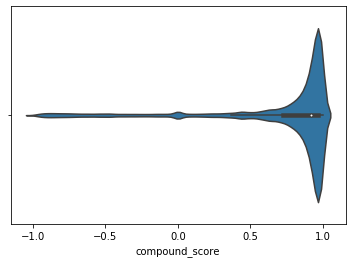

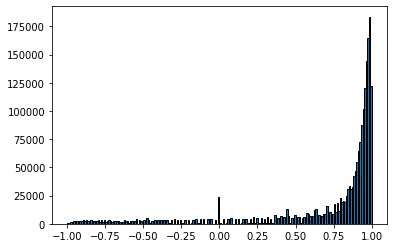

In [67]:
# Explore the distribution of compound_score before grouping to Positive, Negative, and Netural

plt.figure()
sns.violinplot(review_nora['compound_score'])
plt.show()

plt.figure()
plt.hist(review_nora['compound_score'], edgecolor='black', bins=200)
plt.show()

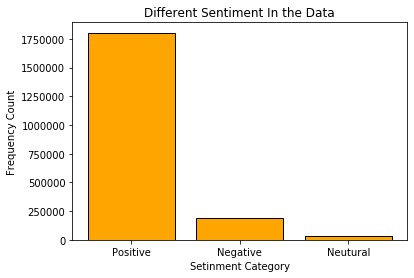

In [68]:
# get value count for positive, netural, and negative reviews in the data

pos = (review_nora['compound_score']>=0.05).sum()
neg = (review_nora['compound_score']<=-0.05).sum()
neu = ((review_nora['compound_score']>-0.05) & (review_nora['compound_score']<0.05)).sum()

sentiment = ['Positive','Negative','Neutural']
count =[pos, neg, neu]
plt.figure()
plt.bar(sentiment, count,edgecolor = 'black', color='orange')
plt.title('Different Sentiment In the Data')
plt.xlabel('Setinment Category')
plt.ylabel('Frequency Count')
plt.show()

# Combining df

## Create new df by combining different data

### Status: Done

### Final Variable: df

Combined review_nora, aggregate_checkins, business_name, is_open from business to one single files

In [70]:
review_nora.head(2)

,review_id,user_id,business_id,stars,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542


In [71]:
#subset business_id, name, review count, is_open, stars from business files
business_subset = business[['business_id','name', 'review_count', 'is_open','stars']]
business_subset.head(2)

,business_id,name,review_count,is_open,stars
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",22,1,4.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",11,1,3.0


In [72]:
#remove "" in the name column for busines_subset
business_subset['name']= business_subset['name'].apply(lambda x : x.replace('"',''))

business_subset.head(2)

,business_id,name,review_count,is_open,stars
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,22,1,4.0
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,11,1,3.0


In [73]:
aggregate_checkins.head(2)

,business_id,num_checkins
0,--6MefnULPED_I942VcFNA,139
1,--7zmmkVg-IMGaXbuVd0SQ,153


In [74]:
# merge review_nora_cleaned with business_subset
df = pd.merge(review_nora, business_subset, on = 'business_id', how='left')

In [75]:
# merge df with aggregate_checkins
df = pd.merge(df, aggregate_checkins, on = 'business_id', how='left')

df.head()

,review_id,user_id,business_id,stars_x,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,stars_y,num_checkins
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0


In [78]:
# rename the column
df.columns

Index(['review_id', 'user_id', 'business_id', 'star_individual', 'date',
       'text', 'cleaned_text', 'polarity', 'subjectivity', 'review_length',
       'negative', 'neutral', 'positive', 'compound_score', 'name',
       'review_count', 'is_open', 'business_stars', 'num_checkins'],
      dtype='object')

In [77]:
df.columns=['review_id',           'user_id',       'business_id', \
            'star_individual',        'date',              'text', \
            'cleaned_text',          'polarity',      'subjectivity', \
           'review_length',          'negative',           'neutral', \
                'positive',    'compound_score',              'name', \
            'review_count',           'is_open',           'business_stars', \
           'num_checkins']

In [80]:
df.to_csv('~/yelp/review_final.csv', index=False)
df.head(2)

,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0


In [90]:
df[['cleaned_text',          'polarity',      'subjectivity', \
           'review_length',          'negative',           'neutral', \
                'positive',    'compound_score',              \
            'review_count',           \
           'num_checkins']].head(2)

,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,review_count,num_checkins
0,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.0,0.445,0.555,0.9287,84,119.0
1,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.0,0.802,0.198,0.8542,50,62.0


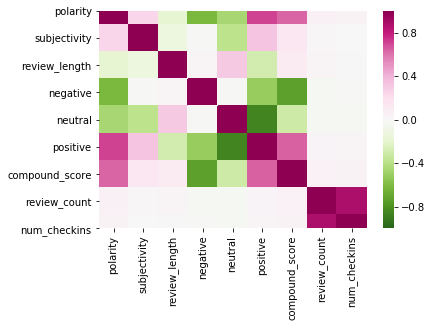

,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,review_count,num_checkins
polarity,1.000000,0.245347,-0.188277,-0.613318,-0.460344,0.715677,0.637224,0.055156,0.044022
subjectivity,0.245347,1.000000,-0.124951,-0.010044,-0.381878,0.334163,0.135592,0.017107,0.007665
review_length,-0.188277,-0.124951,1.000000,0.028958,0.312269,-0.284045,0.111392,0.025378,0.010345
negative,-0.613318,-0.010044,0.028958,1.000000,-0.014208,-0.508120,-0.733804,-0.023117,-0.014925
neutral,-0.460344,-0.381878,0.312269,-0.014208,1.000000,-0.853977,-0.304740,-0.026670,-0.027011
positive,0.715677,0.334163,-0.284045,-0.508120,-0.853977,1.000000,0.644340,0.035005,0.031035
compound_score,0.637224,0.135592,0.111392,-0.733804,-0.304740,0.644340,1.000000,0.054417,0.040125
review_count,0.055156,0.017107,0.025378,-0.023117,-0.026670,0.035005,0.054417,1.000000,0.886773
num_checkins,0.044022,0.007665,0.010345,-0.014925,-0.027011,0.031035,0.040125,0.886773,1.000000


In [4]:
# check on coorelations

df_subset =df[['polarity','subjectivity','review_length','negative','neutral','positive', 'compound_score','review_count',
              'num_checkins']]

df_subset_corr = df_subset.corr()

#visulize correlation matrix in heatmap
plt.figure()
sns.heatmap(df_subset_corr, vmin=-1, vmax=1, cmap='PiYG_r')
plt.show()


df_subset_corr

In [37]:
# check on missing values
df.isnull().sum()

review_id             0
user_id               0
business_id           0
star_individual       0
date                  0
text                  0
cleaned_text         16
polarity              0
subjectivity          0
review_length         0
negative              0
neutral               0
positive              0
compound_score        0
name                  0
review_count          0
is_open               0
business_stars        0
num_checkins       5736
dtype: int64

In [44]:
#check on describe stats for num_checkins
df['num_checkins'].describe().apply(lambda x: format(x, 'f'))

count    2021385.000000
mean        1275.963367
std         2800.091761
min            1.000000
25%          116.000000
50%          394.000000
75%         1199.000000
max        32393.000000
Name: num_checkins, dtype: object

In [45]:
# Replace num_checkins for missing as 0. In the data not every restaurants have check ins. Therefore, replace with 0 for nan
df['num_checkins'] = np.where(df['num_checkins'].isnull(),0, df['num_checkins'])
df['num_checkins'].describe().apply(lambda x: format(x, 'f'))

count    2027121.000000
mean        1272.352864
std         2796.948686
min            0.000000
25%          114.000000
50%          391.000000
75%         1191.000000
max        32393.000000
Name: num_checkins, dtype: object

In [47]:
# drop the 16 missing values for cleaned text

df = df.dropna(axis=0).reset_index(drop=True)

#sanity check
display(df.shape)
df.isnull().sum()

(2027105, 19)

review_id          0
user_id            0
business_id        0
star_individual    0
date               0
text               0
cleaned_text       0
polarity           0
subjectivity       0
review_length      0
negative           0
neutral            0
positive           0
compound_score     0
name               0
review_count       0
is_open            0
business_stars     0
num_checkins       0
dtype: int64

In [51]:
# Save the final df 

df.to_csv('~/yelp/review_final.csv', index=False)

## Eliminate foreign language in the review

In [50]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins,language
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0,en
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0,en
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0,en
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0,en
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0,en


In [12]:
# using language detect to find what language is the text
from langdetect import detect
a = df['text']
language_list =[]
for n in a.index:
    language_list.append(detect(a[n]))

In [13]:
#check on the different unique values in the language list
np.unique(language_list, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'ja', 'ko', 'lt', 'nl', 'no', 'pl', 'pt',
        'ro', 'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'vi',
        'zh-cn', 'zh-tw'], dtype='<U5'),
 array([     43,      37,       3,      20,      32,     388, 2013544,
           1100,      16,       4,   10674,       5,       1,      12,
            135,     300,     116,       1,      66,      30,       6,
             93,      16,       5,       3,      22,       1,      32,
              1,      13,      24,       3,     239,     120]))

In [14]:
# add language to df

df['language'] = language_list
df.head()

,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins,language
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0,en
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0,en
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0,en
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0,en
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0,en


In [16]:
# only use English language review comments
df1 = df[df['language']=='en']
df1.shape

(2013544, 20)

In [35]:
# save df1 to df and save df to review_final.csv
df= df1.reset_index(drop=True)
df.to_csv('~/yelp/review_final.csv')

In [37]:
#count number of English Record
df1['language'].value_counts()

en    2013544
Name: language, dtype: int64

## Continue to Remove non-english character

In [130]:
# checking sample text
display(df['cleaned_text'][829118])
type(df['cleaned_text'][829118])

'皆さん、こんいちわ。 ぼくわおすかです。 start things place got giant window door broadcasting league legends right entire place filled tvs playing league related videos tables labled number league legend champion pretty cool snacks come raw skewer mini conveyer belt rotates skewer cooks meat kinda like kbbq cept skewer ayce price person avg depending eat wouldnt say pricey unique like variety food choices snacks example clamshells mussles beeflamb kabobs skewers fried potatoe chips pretty taiwanese snacks expect chinese night market taste asianight claims free wifi kinda disappears seconds soo idk lol overall good'

str

In [134]:
#Filter out the mixed english and other languages 
#apply Regex to remove non english characters in each of the reviews
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]','', x).strip() )


'start things place got giant window door broadcasting league legends right entire place filled tvs playing league related videos tables labled number league legend champion pretty cool snacks come raw skewer mini conveyer belt rotates skewer cooks meat kinda like kbbq cept skewer ayce price person avg depending eat wouldnt say pricey unique like variety food choices snacks example clamshells mussles beeflamb kabobs skewers fried potatoe chips pretty taiwanese snacks expect chinese night market taste asianight claims free wifi kinda disappears seconds soo idk lol overall good'

In [74]:
# export df to csv
df.to_csv('~/yelp/review_final.csv', index=False)

In [72]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'review_id', 'user_id', 'business_id',
       'star_individual', 'date', 'text', 'cleaned_text', 'polarity',
       'subjectivity', 'review_length', 'negative', 'neutral', 'positive',
       'compound_score', 'name', 'review_count', 'is_open', 'business_stars',
       'num_checkins', 'language'],
      dtype='object')

In [73]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins,language
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0,en
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0,en
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0,en
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0,en
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0,en


In [164]:
df.head()

,review_id,user_id,business_id,star_individual,date,text,cleaned_text,polarity,subjectivity,review_length,negative,neutral,positive,compound_score,name,review_count,is_open,business_stars,num_checkins,language
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,super simple place amazing nonetheless serve t...,0.327083,0.605952,15,0.000,0.445,0.555,0.9287,Wilensky's,84,1,4.0,119.0,en
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,small unassuming place changes menu cool decor...,0.342857,0.571429,41,0.000,0.802,0.198,0.8542,Tuck Shop,50,1,4.5,62.0,en
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,lester located beautiful neighborhood 1951 kno...,0.425000,0.525000,24,0.000,0.855,0.145,0.5994,Lester's Deli,70,1,4.0,72.0,en
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,love coming yes place needs floor swept peanut...,0.070000,0.495385,44,0.053,0.716,0.231,0.8658,Five Guys,61,1,3.5,89.0,en
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,chocolate almond croissant amazing light butte...,0.500000,0.700000,17,0.000,0.667,0.333,0.8176,Maison Christian Faure,397,1,4.5,755.0,en


# Get the word cloud for each of the star ratings

## Status: Done 

    1. Parse out each star ratings with its related cleaned text
    2. Word Cloud for each ratings. 

In [3]:
# Separate the stars and the text based on the ratings, change the pd series to list
star_5 = pd.DataFrame(df[df['star_individual']==5]).reset_index(drop=True)
star_4 = pd.DataFrame(df[df['star_individual']==4]).reset_index(drop=True)
star_3 = pd.DataFrame(df[df['star_individual']==3]).reset_index(drop=True)
star_2 = pd.DataFrame(df[df['star_individual']==2]).reset_index(drop=True)
star_1 = pd.DataFrame(df[df['star_individual']==1]).reset_index(drop=True)

In [11]:
#Display shape for each dataframe
display(star_5.shape)
display(star_4.shape)
display(star_3.shape)
display(star_2.shape)
display(star_1.shape)

(862727, 20)

(472769, 20)

(240588, 20)

(179199, 20)

(258261, 20)

In [13]:
# Get a sample of approximate 20% of original data for creating wordcloud 
star_5_sample=star_5.sample(175000).reset_index(drop=True)
star_4_sample=star_4.sample(95000).reset_index(drop=True)
star_3_sample=star_3.sample(50000).reset_index(drop=True)
star_2_sample=star_2.sample(36000).reset_index(drop=True)
star_1_sample=star_1.sample(52000).reset_index(drop=True)

In [14]:
#Display shape for each sample dataframe
display(star_5_sample.shape)
display(star_4_sample.shape)
display(star_3_sample.shape)
display(star_2_sample.shape)
display(star_1_sample.shape)

(175000, 20)

(95000, 20)

(50000, 20)

(36000, 20)

(52000, 20)

In [15]:
#Transform the cleaned_text from columns to text
text_5 = ' '.join(cleaned_text for cleaned_text in star_5_sample['cleaned_text'])
text_4 = ' '.join(cleaned_text for cleaned_text in star_4_sample['cleaned_text'])
text_3 = ' '.join(cleaned_text for cleaned_text in star_3_sample['cleaned_text'])
text_2 = ' '.join(cleaned_text for cleaned_text in star_2_sample['cleaned_text'])
text_1 = ' '.join(cleaned_text for cleaned_text in star_1_sample['cleaned_text'])

#Sanity check
display(type(text_5))
display(type(text_4))
display(type(text_3))
display(type(text_2))
display(type(text_1))

str

str

str

str

str

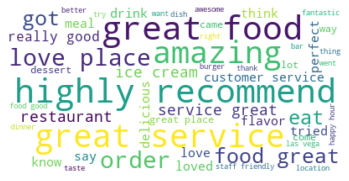

In [18]:
from wordcloud import WordCloud
# wordcloud for star_5 
cloud = WordCloud(background_color="white", max_words=50, max_font_size=50).generate(text_5)
plt.figure()
plt.imshow(cloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

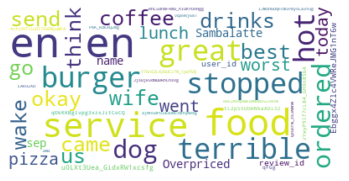

In [19]:
# wordcloud for star_1
cloud4 = WordCloud(background_color="white", max_words=50, max_font_size=50).generate(str(star_1))
plt.figure()
plt.imshow(cloud4, interpolation ='bilinear')
plt.axis('off')
plt.show()

In [124]:
# Update stopwords
stopwords = set(STOPWORDS)
stopwords.update(['food', 'coffee', 'ice cream','hot dog','burger','pizza','eat','think','restaurant','thing','sure','said',\
                 'stopped','today','dog','ice','cream','lot','come','meal','order','dessert','tried','say','know','came',\
                  'ordered','got','want','menu','meat','dogs','burgers','right', 'make','guy','going','let','told','tell',\
                  'day', 'really','friend','look','looked','way','gave','check','salad','plate','husband','wife','instead',\
                  'asked','actually','wanted','place','went','ask','called','good','eating','item thought','love','loved',\
                  'try','definitely','home','people','thank','things','las vega','dishes'
                 ])

### Testing word cloud to update stopwords

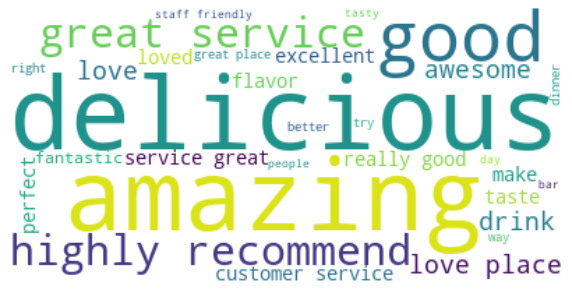

In [41]:
# wordcloud for star_5 
cloud = WordCloud(stopwords=stopwords, background_color="white", max_words=30).generate(text_5)
plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

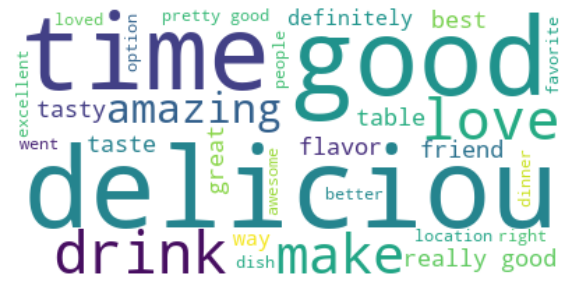

In [42]:
# wordcloud for star_4
cloud1 = WordCloud(stopwords=stopwords, background_color="white", max_words=30).generate(text_4)
plt.figure(figsize=(10,10))
plt.imshow(cloud1, interpolation ='bilinear')
plt.axis('off')
plt.show()

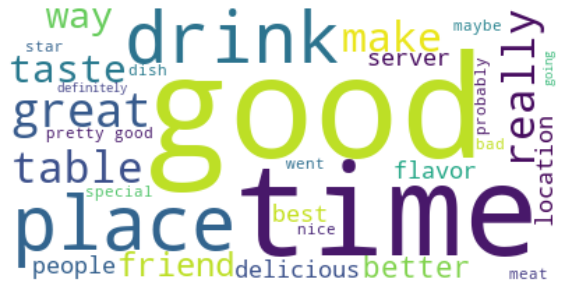

In [43]:
# wordcloud for star_3
cloud2 = WordCloud(stopwords=stopwords, background_color="white", max_words=30).generate(text_3)
plt.figure(figsize=(10,10))
plt.imshow(cloud2, interpolation ='bilinear')
plt.axis('off')
plt.show()

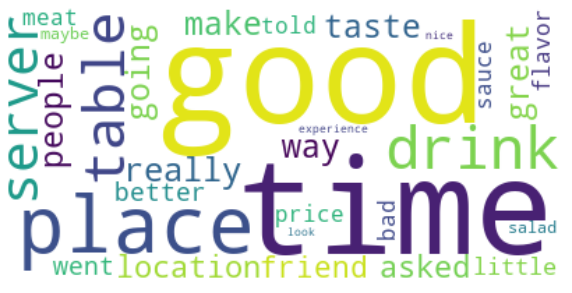

In [44]:
# wordcloud for star_2
cloud3 = WordCloud(stopwords = stopwords, background_color="white", max_words=30).generate(text_2)
plt.figure(figsize=(10,10))
plt.imshow(cloud3, interpolation ='bilinear')
plt.axis('off')
plt.show()

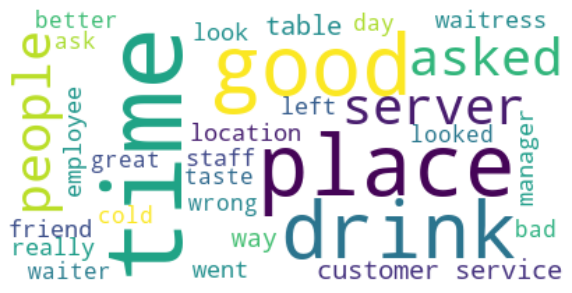

In [68]:
# wordcloud for star_1
cloud4 = WordCloud(stopwords=stopwords, background_color="white", max_words=30).generate(text_1)
plt.figure(figsize=(10,10))
plt.imshow(cloud4, interpolation ='bilinear')
plt.axis('off')
plt.show()

### Create Mask for word cloud for star rating 5

In [ ]:
# visualize mask for star 5 rating
Image.open('like.png')

In [115]:
#define like mask
like =np.array(Image.open('like.png'))
#check on numpy array whether all are 255
like

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

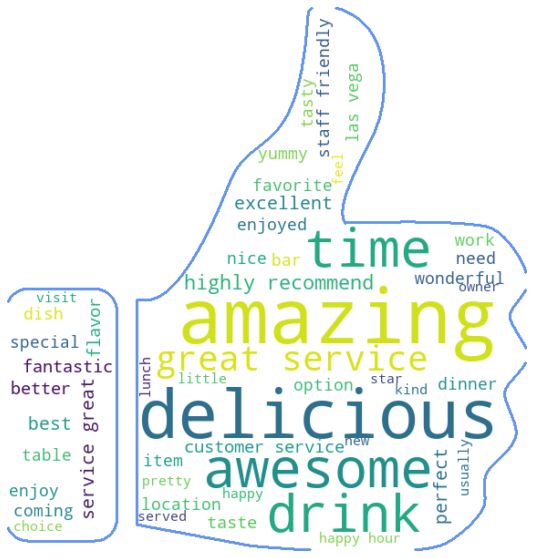

In [125]:
# wordcloud for star_5 with maske
cloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50, mask=like, contour_width=3,
                 contour_color ='cornflowerblue').generate(text_5)
plt.figure(figsize=(20,10))
plt.imshow(cloud, interpolation ='bilinear')
plt.axis('off')
plt.show()

### Create Mask for word cloud for Star rating 1

In [ ]:
dislike =np.array(Image.open('dislike2.png'))
dislike

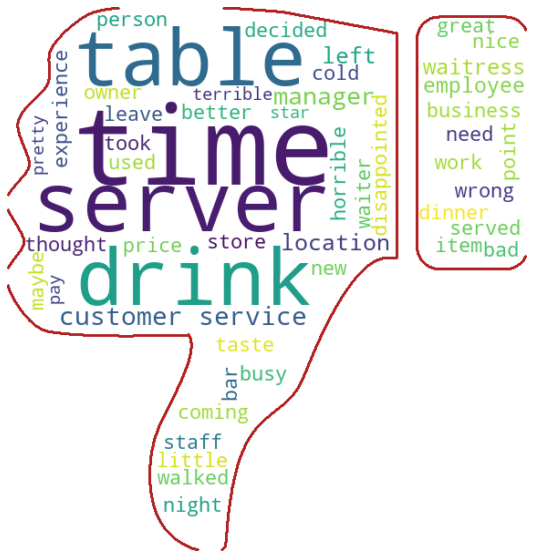

In [133]:
# wordcloud for star_1 with mask
cloud4 = WordCloud(stopwords=stopwords, background_color="white", max_words=50, mask = dislike, contour_width = 3,
                  contour_color ='firebrick').generate(text_1)
plt.figure(figsize = (20,10))
plt.imshow(cloud4, interpolation ='bilinear')
plt.axis('off')
plt.show()

# Data Exploray Analysis

### Visulize the distribution of Negative Neutral Positive Distribution

In [184]:
#visulize the Negative Reviews with number of stars ratings

#subset the three sentiment to a df
sentiment = df[['positive', 'neutral','negative']]
display(sentiment.head())

#resahpe the sentiment to long form 
sentiment_long = pd.melt(sentiment, var_name = 'Sentiment Category', value_name='Sentiment Value')

#sanity check on the long form dataframe
display(sentiment_long[sentiment_long['Sentiment Category']=='positive'].head(5))
display(sentiment_long[sentiment_long['Sentiment Category']=='neutral'].head(5))
display(sentiment_long[sentiment_long['Sentiment Category']=='negative'].head(5))

,positive,neutral,negative
0,0.555,0.445,0.000
1,0.198,0.802,0.000
2,0.145,0.855,0.000
3,0.231,0.716,0.053
4,0.333,0.667,0.000


,Sentiment Category,Sentiment Value
0,positive,0.555
1,positive,0.198
2,positive,0.145
3,positive,0.231
4,positive,0.333


,Sentiment Category,Sentiment Value
2013544,neutral,0.445
2013545,neutral,0.802
2013546,neutral,0.855
2013547,neutral,0.716
2013548,neutral,0.667


,Sentiment Category,Sentiment Value
4027088,negative,0.000
4027089,negative,0.000
4027090,negative,0.000
4027091,negative,0.053
4027092,negative,0.000


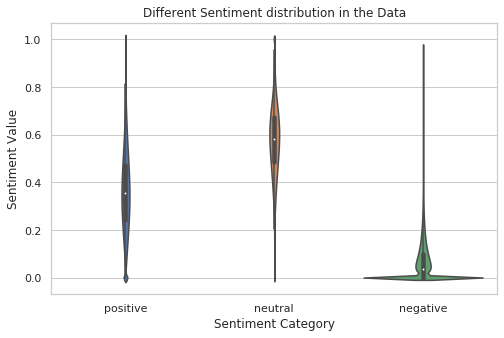

In [188]:
#Visualize the distribution for three category using violin plot
plt.figure(figsize=(8,5))
sns.set(style = 'whitegrid')
sns.violinplot(x ='Sentiment Category', y='Sentiment Value', data= sentiment_long)
plt.title('Different Sentiment distribution in the Data')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Value')
plt.show()

### Visulize the distribution of star reviews

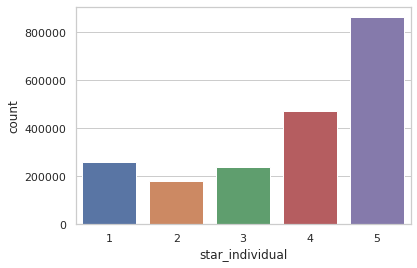

In [209]:
# visulize the star ratings count
plt.figure()
sns.countplot(x = 'star_individual', data=df)
plt.show()

# Train Test Split 

Before I start to modeling, it is important to split the dataset into the train and test. Since I will have two different prediction models, I will create y1 and y2. y1 is the star ratings predictions from the review comments. y2 is binary class prediction on whether the business will continue based on the review comments. In addition, I found the y1 and y2 are both imbalance in terms of class distribution. Therefore, I utlized the oversampling method to make sure bothe y1 and y2 are balanced. 

1. Setting up X and y. Two different y. y1 = business_stars, y2=is_open
2. Train test split

In [3]:
# Setting up X and y1  - Using sentiment and other numeric data to get business_stars

#X combine cleaned_text with numeric data

X = df[['polarity', 'subjectivity', 'review_length', \
       'negative', 'neutral', 'positive', 'compound_score','review_count','num_checkins']]

#y1 is the stars ratings for each reviewer
y1 = df['star_individual']


# y2 is whether the business is still open
y2 = df['is_open']

In [4]:
display(X.shape)
display(y1.shape)

(2013544, 9)

(2013544,)

In [5]:
# Check on y1 for number of different classes
y1.value_counts()
#y1 has imbalance between each ratings

5    862727
4    472769
1    258261
3    240588
2    179199
Name: star_individual, dtype: int64

In [6]:
# Check on y2 for number of different classes
y2.value_counts()

# y2 has imbalance between open and close

1    1868662
0     144882
Name: is_open, dtype: int64

In [7]:
#Over sampling to make the imbanced class balanced
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X,y1)
X_resampled_2, y_resampled_2 =smote.fit_resample(X,y2)

In [8]:
display(X_resampled.shape)
display(y_resampled.shape)

display(X_resampled_2.shape)
display(y_resampled_2.shape)

(4313635, 9)

(4313635,)

(3737324, 9)

(3737324,)

In [9]:
a =  pd.DataFrame(y_resampled)
a.columns=['y1']
display(a.y1.value_counts())


5    862727
4    862727
3    862727
2    862727
1    862727
Name: y1, dtype: int64

In [10]:
#Display the result after oversampling and replace y2 with oversampling results
b = pd.DataFrame(y_resampled_2)
b.columns=['y2']
display(b.y2.value_counts())


1    1868662
0    1868662
Name: y2, dtype: int64

##  Combination X -y1 numeric with star ratings

In [11]:
# split the X1- y1 data into train_test split set up test_size to be 0.3
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_resampled, y_resampled, test_size=0.3,\
                                                            random_state=15, stratify = y_resampled)

## Combination X -y2 numeric data with business continuity

In [12]:
# split the X1- y2 data into train_test split set up test_size to be 0.3
from sklearn.model_selection import train_test_split
X_train_con, X_test_con, y_train_con, y_test_con = train_test_split(X_resampled_2, y_resampled_2 ,\
                                                                    test_size=0.3, random_state=15, stratify = y_resampled_2)

#  Modeling - Star Rating y1

In this section, I will use all numeric features I developed from the feature engineering section to predict the individual rates. 

First I will simply run a Logistic Regression, Random Forest, SVM (linear), SVM (Non-linear), Xgboost without changing any hyperparameters. Also I will apply a PCA dimention reduction and run a second logistic regression to see whether the accuracy rate increase. 

Second, I will pick top three models with highes accuracy (Logistic Regression without PCA, Random Forest, and Xgboost) and tunning the hyperparameter for each of the models. 

Finnally, after determined the hyperparameters for each of the three models, I will evaluate the model accuracy, and confusion matrix and pick the best model. 

Steps: 
1. Run Logistic Regression, RandomForest, SVM (linear), SVM, Xgboost without tuning any hyperparameter
2. Apply PCA with 1-9 then run the logistic regression again. Compare the accuracy
3. Optimize Logistic Regression, RandomForest, and Xgboost by tuning hyperparameter. 

#### First Logistic Regression

In [48]:
#Logistic regression with Numeric data and star ratings 
from sklearn.linear_model import LogisticRegression
log_num = LogisticRegression(solver='lbfgs').fit(X_train_1,y_train_1)

print(f'Train Data Score for Log with X1-y1: {log_num.score(X_train_1, y_train_1)}')
print(f'Test Data Score for Log with X1-y1: {log_num.score(X_test_1, y_test_1)}')


Train Data Score for Log with X1-y1: 0.42623124551256747
Test Data Score for Log with X1-y1: 0.4262157761703002


In [78]:
#Apply PCA with Logistic Regression
from sklearn.decomposition import PCA

for n in range(1,10):
    my_pca = PCA(n_components=n).fit(X_train_1) 

    #Transform the data
    X_train_1_pca = my_pca.transform(X_train_1) 
    X_test_1_pca = my_pca.transform(X_test_1)

    #Logistic regression with Numeric data and star ratings after PCA
    from sklearn.linear_model import LogisticRegression
    log_num = LogisticRegression(solver='lbfgs').fit(X_train_1_pca,y_train_1)

    print(f'Train Data Score for Log with X1-y1: {log_num.score(X_train_1_pca, y_train_1)}')
    print(f'Test Data Score for Log with X1-y1: {log_num.score(X_test_1_pca, y_test_1)}')


Train Data Score for Log with X1-y1: 0.4284622697732497
Test Data Score for Log with X1-y1: 0.42846122265190445
Train Data Score for Log with X1-y1: 0.4284622697732497
Test Data Score for Log with X1-y1: 0.42846122265190445
Train Data Score for Log with X1-y1: 0.4296130487839487
Test Data Score for Log with X1-y1: 0.429706123854426
Train Data Score for Log with X1-y1: 0.5056063228992252
Test Data Score for Log with X1-y1: 0.5055110054563755
Train Data Score for Log with X1-y1: 0.5141676362913983
Test Data Score for Log with X1-y1: 0.5140663903162579
Train Data Score for Log with X1-y1: 0.5153141584130317
Test Data Score for Log with X1-y1: 0.5153030142501457
Train Data Score for Log with X1-y1: 0.5104258308028493
Test Data Score for Log with X1-y1: 0.510626357472056
Train Data Score for Log with X1-y1: 0.5131275363964015
Test Data Score for Log with X1-y1: 0.5126393892037929
Train Data Score for Log with X1-y1: 0.5131268269148906
Test Data Score for Log with X1-y1: 0.5126393892037929


Since the accuracy after PCA is less than before PCA. Therefore, not using PCA before any model. 

#### First RandomForest

In [6]:
#Random Forest with Numeric data and star ratings 
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train_1,y_train_1)

print(f'Train Data Score for RF with X1-y1: {rf_model.score(X_train_1, y_train_1)}')
print(f'Test Data Score for RF with X1-y1: {rf_model.score(X_test_1, y_test_1)}')


Train Data Score for RF with X1-y1: 0.9865886709992338
Test Data Score for RF with X1-y1: 0.48112617206123853


#### First LinearSVC

In [71]:
#SVM with numeric data and star ratings 
from sklearn.svm import LinearSVC

svm_model = LinearSVC().fit(X_train_1,y_train_1)

print(f'Train Data Score for RF with X1-y1: {svm_model.score(X_train_1, y_train_1)}')
print(f'Test Data Score for RF with X1-y1: {svm_model.score(X_test_1, y_test_1)}')

Train Data Score for RF with X1-y1: 0.44673851349433835
Test Data Score for RF with X1-y1: 0.4461778884356625


#### First SVM

In [ ]:
#SVM with numeric data and star ratings 
from sklearn.svm import SVC

svc_model = SVC().fit(X_train_1,y_train_1)

print(f'Train Data Score for RF with X1-y1: {svc_model.score(X_train_1, y_train_1)}')
print(f'Test Data Score for RF with X1-y1: {svc_modebbl.score(X_test_1, y_test_1)}')

#### First XGBoost

In [5]:
#XGBoost with numeric data and star ratings
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_jobs = -1).fit(X_train_1, y_train_1)

print(f'Train Data Score for XGboost with X1-y1: {xgb_model.score(X_train_1, y_train_1)}')
print(f'Test Data Score for XGboost with X1-y1: {xgb_model.score(X_test_1, y_test_1)}')

Train Data Score for XGboost with X1-y1: 0.5293661492181514
Test Data Score for XGboost with X1-y1: 0.5298345870636224


#### Optimize Logistic Regress by Tunning out Hyperparameter c

In [14]:
#import packages
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [16]:
# setting up c value for logistic regression
log_c = list(map(lambda x: 10**x, range(-10,5)))

cv_score =[]
for c in log_c:
    print(c, end= ' ')
    log_num2 = LogisticRegression(C=c, solver = 'lbfgs', multi_class='multinomial', n_jobs=-1)
    
    avg_score = np.mean(cross_val_score(log_num2, X_train_1, y_train_1, cv=5))
    
    cv_score.append(avg_score)


#Plot out the result
plt.figure()
plt.plot(log_c, cv_score, label="Cross Validation Score",marker='.')
plt.legend()
plt.title('Cross Validatation Score for Different C Value in Logistic regression')
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

1e-10 

OSError: [Errno 12] Cannot allocate memory

Based on above hyperparameter optimization for c value in logistic regression, when c= 1e(-10) the accuracy seems to have the highest. Therefore, the logsitc regression will choose c= 1e(-10)  

#### Optimize Random Forest by Tunning out Hyperparameter n

In [15]:
# setting up number_estimator for logistic regression
number_estimator = np.arange(100,500,100)

cv_score_rf = []
from sklearn.ensemble import RandomForestClassifier
for t in number_estimator:
    print(t, end= ' ')
    rf_model_2 = RandomForestClassifier(n_estimators = t, n_jobs=-1)
    avg_score1 = np.mean(cross_val_score(rf_model_2, X_train_1, y_train_1, cv=3))
    
    cv_score_rf.append(avg_score1)
    

100 200 300 400 

MemoryError: 

In [ ]:
#Plot out the result
plt.figure()
plt.plot(number_estimator, cv_score_rf, label="Cross Validation Score",marker='.')
plt.legend()
plt.title('Cross Validatation Score for Different C Value in Random Forest')
plt.xlabel('Regularization Parameter: n_estimator')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

Based on above hyperparameter optimization for number of estimator in Random Forest, when number of trees equal to 300 the accuracy seems to have the highest. Therefore, for the Random Forest the number of trees will be equal to 300.  

#### Optimize Xgboost by Tunning out Hyperparameter n

In [18]:
# setting up number_estimator for logistic regression
log_c = list(map(lambda x: 10**x, range(-10,10)))

cv_score_xg = []
from xgboost import XGBClassifier
for l in log_c:
    
    xgb_model_2 = XGBClassifier(learning_rate=l, n_jobs=-1)
    avg_score2 = np.mean(cross_val_score(xgb_model_2, X_train_1, y_train_1, cv=3))
    
    cv_score_xg.append(avg_score2)
    
    print(l, end=' ')

1e-10 1e-09 1e-08 1e-07 1e-06 1e-05 0.0001 0.001 0.01 0.1 1 10 100 1000 10000 100000 1000000 10000000 100000000 1000000000 

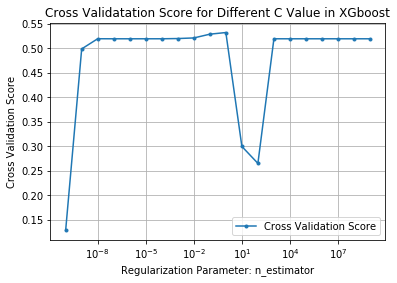

In [21]:
#Plot out the result
plt.figure()
plt.plot(log_c, cv_score_xg, label="Cross Validation Score",marker='.')
plt.legend()
plt.title('Cross Validatation Score for Different C Value in XGboost')
plt.xlabel('Regularization Parameter: n_estimator')
plt.xscale('log')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

Based on above hyperparameter optimization for learning rate in XGboost, when the learning rate equals to 1 the accuracy seems to have the highest. Therefore, for the XGboost the learning rate will be equal to 1.  

#### Final Logistic Regression Model

In [212]:
from sklearn.linear_model import LogisticRegression
log_num_final = LogisticRegression(solver='lbfgs', C=10**(-10), multi_class='multinomial', n_jobs=-1).fit(X_train_1,y_train_1)

print(f'Train Data Score for final Logistic model with X1-y1: {log_num_final.score(X_train_1, y_train_1)}')
print(f'Test Data Score for final Logistic model with X1-y1: {log_num_final.score(X_test_1, y_test_1)}')


#print out classification report 
y_pred_log_num_final = log_num_final.predict(X_test_1)
print(classification_report(y_test_1, y_pred_log_num_final))


Train Data Score for final Logistic model with X1-y1: 0.2255118653677509
Test Data Score for final Logistic model with X1-y1: 0.22628470486233193
              precision    recall  f1-score   support

           1       0.34      0.02      0.04    258819
           2       0.22      0.37      0.28    258818
           3       0.20      0.42      0.27    258818
           4       0.21      0.10      0.14    258818
           5       0.31      0.22      0.26    258818

    accuracy                           0.23   1294091
   macro avg       0.26      0.23      0.20   1294091
weighted avg       0.26      0.23      0.20   1294091



<span class="mark">#### Final Random Forest Model</span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model_final = RandomForestClassifier(n_estimators = t, n_jobs=-1).fit(X_train_1, y_train_1)

print(f'Train Data Score for final Random Forest model with X1-y1: {rf_model_final.score(X_train_1, y_train_1)}')
print(f'Test Data Score for final Random Forest model with X1-y1: {rf_model_final.score(X_test_1, y_test_1)}')

#print out classification report 
y_pred_rf_num_final = rf_model_final.predict(X_test_1)
print(classification_report(y_test_1,y_pred_rf_num_final))


#### Final Xgboost Model

In [213]:
from xgboost import XGBClassifier
xgb_model_final = XGBClassifier(learning_rate=1, n_jobs=-1).fit(X_train_1, y_train_1)

print(f'Train Data Score for final Xgboost model with X1-y1: {xgb_model_final.score(X_train_1, y_train_1)}')
print(f'Test Data Score for final Xgboost model with X1-y1: {xgb_model_final.score(X_test_1, y_test_1)}')

#print out classification report 
y_pred_xgb_num_final = xgb_model_final.predict(X_test_1)
print(classification_report(y_test_1,y_pred_xgb_num_final))


Train Data Score for final Xgboost model with X1-y1: 0.4943180162302652
Test Data Score for final Xgboost model with X1-y1: 0.4923386377001308
              precision    recall  f1-score   support

           1       0.62      0.67      0.64    258819
           2       0.41      0.41      0.41    258818
           3       0.38      0.36      0.37    258818
           4       0.43      0.35      0.39    258818
           5       0.59      0.67      0.62    258818

    accuracy                           0.49   1294091
   macro avg       0.48      0.49      0.49   1294091
weighted avg       0.48      0.49      0.49   1294091



## <span class="mark">Model Evaluation: Star Rating y1</span>

Based on above resutls. 

#  Modeling - Business continuity y2

## Business Continuity y2

In this section, I will use all numeric features I developed from the feature engineering section to predict the business continuity.

First I will simply run Logistic Regression, Random Forest, Xgboost without changing any hyperparameters. 

Second, I will tune the hyperparmeters for the sklearn Logistic Regression, Random Forest, Xgboost with cross validation in the training data.

Finnally, after determined the hyperparameters for each of the three models, I will evaluate the model accuracy, and confusion matrix and pick the best model. 


#### First Logistic Regression without Tunning

In [154]:
# Logistic Regression with numeric data and business continuity
from sklearn.linear_model import LogisticRegression
log_num2 = LogisticRegression().fit(X_train_con,y_train_con)

#get the accuracy score
print(f'Train Data Score for Log with X1-y2: {log_num2.score(X_train_con, y_train_con)}')
print(f'Test Data Score for Log with X1-y2: {log_num2.score(X_test_con, y_test_con)}')


Train Data Score for Log with X1-y2: 0.5596641751964546
Test Data Score for Log with X1-y2: 0.5589583641783165


In [155]:
# Confusion Matrix for logistic regression
from sklearn.metrics import classification_report

y_pred_log_num2 = log_num2.predict(X_test_con)
print(classification_report(y_test_con, y_pred_log_num2))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64    560599
           1       0.61      0.33      0.42    560599

    accuracy                           0.56   1121198
   macro avg       0.58      0.56      0.53   1121198
weighted avg       0.58      0.56      0.53   1121198



#### First Random Forest without Tunning

In [80]:
#Random Forest with Numeric data and continuity 
from sklearn.ensemble import RandomForestClassifier

rf_model_con = RandomForestClassifier().fit(X_train_con, y_train_con)

print(f'Train Data Score for RF with X1-y1: {rf_model_con.score(X_train_con, y_train_con)}')
print(f'Test Data Score for RF with X1-y1: {rf_model_con.score(X_test_con, y_test_con)}')


# Get the prediction value for rf_model_con
y_pred_rf = rf_model_con.predict(X_test_con)

#print confusion matrix
print(classification_report(y_test_con, y_pred_rf))

Train Data Score for RF with X1-y1: 0.9964271598539214
Test Data Score for RF with X1-y1: 0.8902272390782002
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    560599
           1       0.93      0.85      0.89    560599

    accuracy                           0.89   1121198
   macro avg       0.89      0.89      0.89   1121198
weighted avg       0.89      0.89      0.89   1121198



#### First XGboost without Tunning

In [81]:
#XGBoost with numeric data and continuity
from xgboost import XGBClassifier
xgb_model_con = XGBClassifier(n_jobs = -1).fit(X_train_con, y_train_con)

print(f'Train Data Score for XGboost with X1-y2: {xgb_model_con.score(X_train_con, y_train_con)}')
print(f'Test Data Score for XGboost with X1-y2: {xgb_model_con.score(X_test_con, y_test_con)}')

# Get the prediction value for rf_model_con
y_pred_xg = xgb_model_con.predict(X_test_con)

#print confusion matrix
print(classification_report(y_test_con, y_pred_xg))


Train Data Score for XGboost with X1-y2: 0.7064590925666424
Test Data Score for XGboost with X1-y2: 0.7060492437553403
              precision    recall  f1-score   support

           0       0.69      0.75      0.72    560599
           1       0.73      0.66      0.69    560599

    accuracy                           0.71   1121198
   macro avg       0.71      0.71      0.71   1121198
weighted avg       0.71      0.71      0.71   1121198



#### Logistic Regression Tunning C value

In [156]:
#import packages
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [157]:
# setting up c value for logistic regression
log_c = list(map(lambda x: 10**x, range(-10,10)))

cv_score_con =[]
for c in log_c:
    
    log_con1 = LogisticRegression(C=c, solver = 'lbfgs',n_jobs=-1)
    
    avg_score1 = np.mean(cross_val_score(log_con1, X_train_con,y_train_con, cv=3))
    
    cv_score_con.append(avg_score1)
    
    print(c, end= ' ')
    
print(cv_score_con)    
    

1e-10 1e-09 1e-08 1e-07 1e-06 1e-05 0.0001 0.001 0.01 0.1 1 10 100 1000 10000 100000 1000000 10000000 100000000 1000000000 [0.5638126756891678, 0.5605551873266044, 0.5601920549698294, 0.5597268633085716, 0.5596878743607915, 0.5596890210945498, 0.5596894033391359, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308, 0.559690167828308]


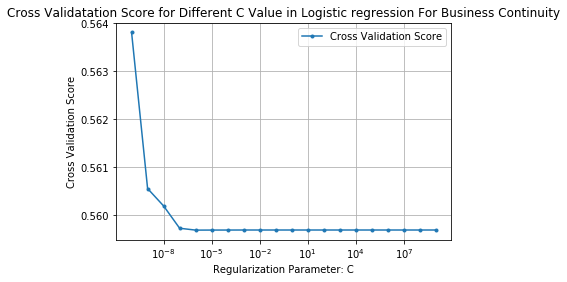

In [158]:
#Plot out the result
plt.figure()
plt.plot(log_c, cv_score_con, label="Cross Validation Score",marker='.')
plt.legend()
plt.title('Cross Validatation Score for Different C Value in Logistic regression For Business Continuity')
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

#### Random Forest Tunning number of trees

In [ ]:
# setting up number_estimator for Random Forest
number_estimator = np.arange(100,500,100)

cv_score_con_rf = []
from sklearn.ensemble import RandomForestClassifier
for t in number_estimator:
    
    rf_model_con1 = RandomForestClassifier(n_estimators = t, n_jobs=-1)
    avg_score_con = np.mean(cross_val_score(rf_model_con1, X_train_con, y_train_con, cv=3))
    
    cv_score_con_rf.append(avg_score_con)

    print(t, end= ' ')


In [ ]:
#Plot out the result
plt.figure()
plt.plot(number_estimator, cv_score_con_rf, label="Cross Validation Score",marker='.')
plt.legend()
plt.title('Cross Validatation Score for Different C Value in Random Forest for Business Continuity')
plt.xlabel('Regularization Parameter: n_estimator')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

#### XGboost tunning learning rate

In [161]:
# setting up number_estimator for XGboost
log_c = list(map(lambda x: 10**x, range(-10,2)))

cv_score_con_xg = []
from xgboost import XGBClassifier
for l in log_c:
    
    xgb_model_con1 = XGBClassifier(learning_rate=l, n_jobs=-1)
    avg_score_con1 = np.mean(cross_val_score(xgb_model_con1, X_train_con, y_train_con, cv=3))
    
    cv_score_con_xg.append(avg_score_con1)
    
    print(l, end=' ')
    
    
   

1e-10 1e-09 1e-08 1e-07 1e-06 1e-05 0.0001 0.001 0.01 0.1 1 10 

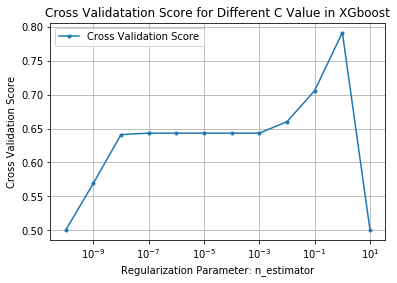

In [163]:
#Plot out the result
plt.figure()
plt.plot(log_c, cv_score_con_xg, label="Cross Validation Score",marker='.')
plt.legend()
plt.title('Cross Validatation Score for Different C Value in XGboost')
plt.xlabel('Regularization Parameter: n_estimator')
plt.xscale('log')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show()

#### Final Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
log_con_final = LogisticRegression(C=10**(-10)).fit(X_train_con,y_train_con)

#get the accuracy score
print(f'Train Data Score for final Log with X1-y2: {log_con_final.score(X_train_con, y_train_con)}')
print(f'Test Data Score for final Log with X1-y2: {log_con_final.score(X_test_con, y_test_con)}')

#print confusion matrix for Final Logistic Regression
y_pred_log_con = log_con_final.predict(X_test_con)
print(classification_report(y_test_con, y_pred_log_con))

Train Data Score for final Log with X1-y2: 0.5651516784742019
Test Data Score for final Log with X1-y2: 0.5643258371848683
              precision    recall  f1-score   support

           0       0.56      0.63      0.59    560599
           1       0.57      0.50      0.53    560599

    accuracy                           0.56   1121198
   macro avg       0.57      0.56      0.56   1121198
weighted avg       0.57      0.56      0.56   1121198



#### <span class="mark">Final Random Forest</span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model_con_final = RandomForestClassifier(n_estimators = t, n_jobs=-1).fit(X_train_con, y_train_con)

#get the accuracy score
print(f'Train Data Score for final RF with X1-y2: {rf_model_con_final.score(X_train_con, y_train_con)}')
print(f'Test Data Score for final RF with X1-y2: {rf_model_con_final.score(X_test_con, y_test_con)}')

#print confusion matrix for Final Logistic Regression
y_pred_rf_con = rf_model_con_final.predict(X_test_con)
print(classification_report(y_test_con, y_pred_rf_con))

#### Final Xgboost

In [216]:
from xgboost import XGBClassifier
xgb_model_con_final = XGBClassifier(learning_rate=1, n_jobs=-1).fit(X_train_con, y_train_con)

#get the accuracy score
print(f'Train Data Score for final Xgboost with X1-y2: {xgb_model_con_final.score(X_train_con, y_train_con)}')
print(f'Test Data Score for final Xgboost with X1-y2: {xgb_model_con_final.score(X_test_con, y_test_con)}')

#print confusion matrix for Final Logistic Regression
y_pred_xgb_con = xgb_model_con_final.predict(X_test_con)
print(classification_report(y_test_con, y_pred_xgb_con))
    

Train Data Score for final Xgboost with X1-y2: 0.8302100128204835
Test Data Score for final Xgboost with X1-y2: 0.8298623436716798
              precision    recall  f1-score   support

           0       0.83      0.83      0.83    560599
           1       0.83      0.83      0.83    560599

    accuracy                           0.83   1121198
   macro avg       0.83      0.83      0.83   1121198
weighted avg       0.83      0.83      0.83   1121198

